## Library Importing

In [121]:
import pandas as pd
import numpy as np

import os
import sys

from scipy import signal
from IPython.display import Audio

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

## Dataset Importing

In [89]:
Crema = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/crema/"
Ravdess = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/ravdess/"
Savee = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/savee/"
Tess = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/tess/"

## Crema

In [90]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1,disgust,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2,fear,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3,happy,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...


## Ravdess

In [91]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\800787859.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


,Emotions,Path
0,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4,calm,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...


## Savee

In [92]:
file_emotion = []
file_path = []

# emotional mapping
emotion_map = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad'
}

for file in os.listdir(Savee):
    full_path = os.path.join(Savee, file)
    file_path.append(full_path)

    code = file.split('_')[1][:-6]  
    emotion = emotion_map.get(code, 'surprise')  
    file_emotion.append(emotion)

Savee_df = pd.DataFrame({
    'Emotions': file_emotion,
    'Path': file_path
})

Savee_df.head()


,Emotions,Path
0,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...


## Tess

In [93]:
file_emotion = []
file_path = []

for dir_name in os.listdir(Tess):
    dir_path = os.path.join(Tess, dir_name)
    for file in os.listdir(dir_path):
        emotion_code = file.split('_')[2].split('.')[0]
        emotion = 'surprise' if emotion_code == 'ps' else emotion_code
        file_emotion.append(emotion)
        file_path.append(os.path.join(dir_path, file))

Tess_df = pd.DataFrame({
    "Emotions": file_emotion,
    "Path": file_path
})

Tess_df.head()

,Emotions,Path
0,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4,angry,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...


## Combination

In [94]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3,neutral,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4,calm,C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...


## Raw Count of Emotions

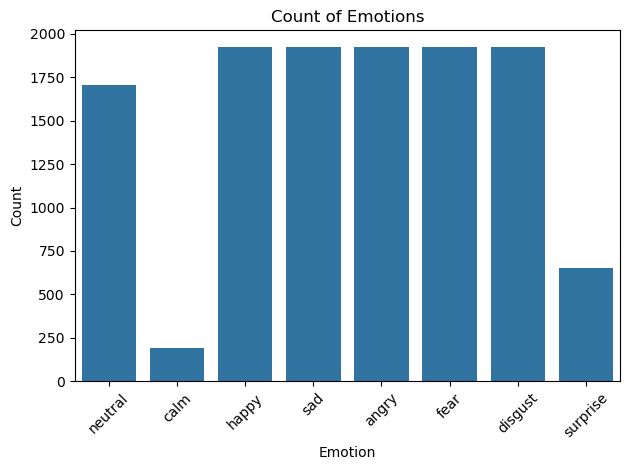

In [95]:
plt.figure()
sns.countplot(x="Emotions", data=data_path)
plt.title("Count of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Extracting 4 Main Emotions

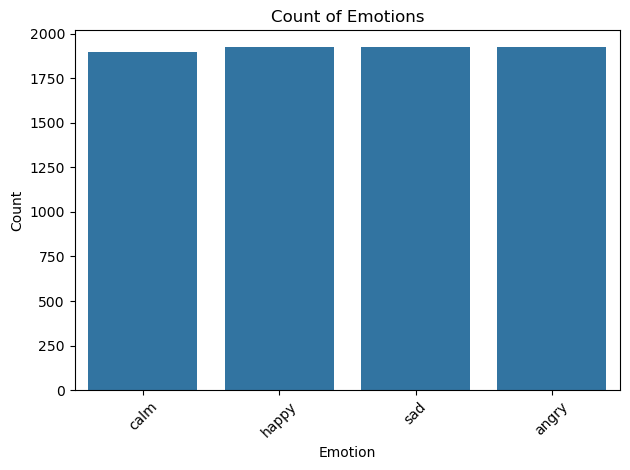

In [96]:
# combining neutral into calm
data_path["Emotions"] = data_path["Emotions"].replace("neutral", "calm")

emotions = ["calm", "happy", "sad", "angry"]
data_subset = data_path[data_path["Emotions"].isin(emotions)]

plt.figure()
sns.countplot(x="Emotions", data=data_subset)
plt.title("Count of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Waveplots and Spectrograms of Each Emotion

In [154]:
def create_waveplot(data, sr, emotion_label):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot For Audio With "{emotion_label}" Emotion', fontsize=15)
    
    time = np.linspace(0, len(data) / sr, num=len(data))
    plt.plot(time, data)
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

def create_spectrogram(data, sr, emotion_label):
    
    # short-time fourier transformation to find frequency x time matrix
    window_ms = 25
    nperseg = int(sr * window_ms / 1000)
    
    f, t, Zxx = signal.stft(data, fs=sr, nperseg=nperseg)

    # convert magnitude to db, allowing visual interpretation for humans
    Zxx_magnitude = np.abs(Zxx)
    Zxx_db = 20 * np.log10(Zxx_magnitude + 1e-10)

    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram for audio with "{emotion_label}" emotion', fontsize=15)
    plt.pcolormesh(t, f, Zxx_db, shading='gouraud', cmap='magma', vmin = -125)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Intensity [dB]')
    plt.tight_layout()
    plt.show()

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\3610595851.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


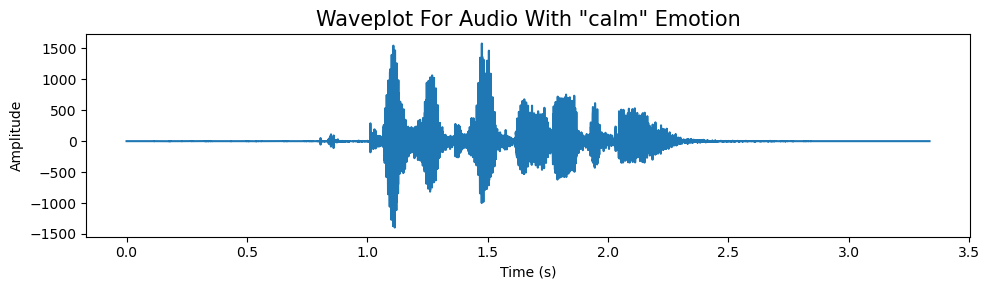

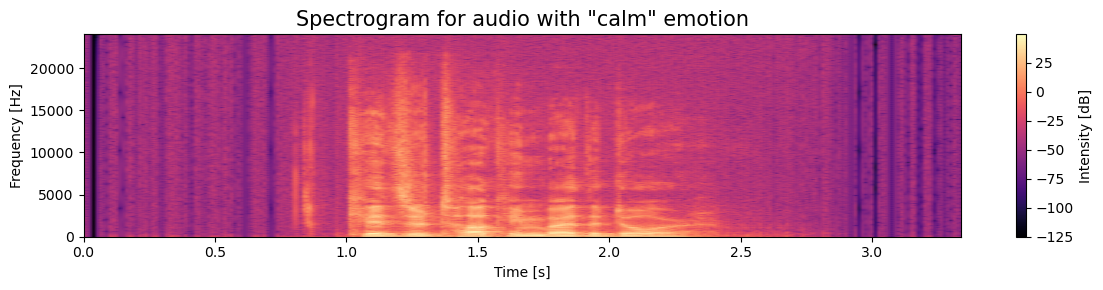

In [155]:
emotion='calm'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\105886060.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


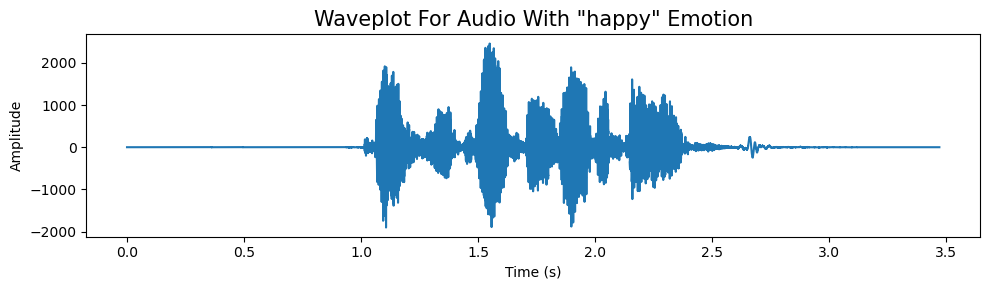

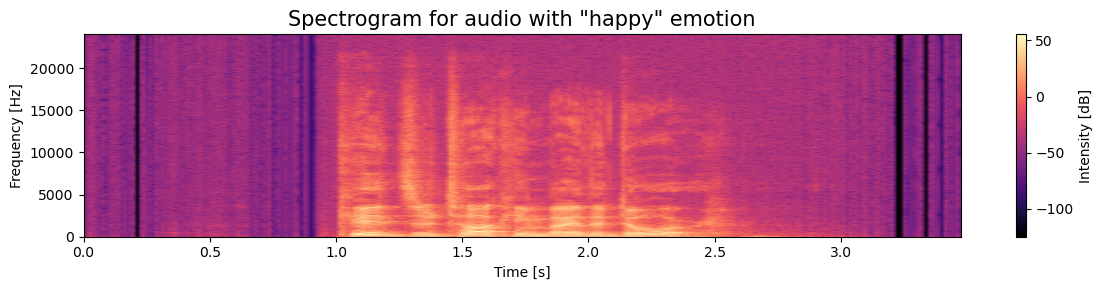

In [156]:
emotion='happy'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)


create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\3208827664.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


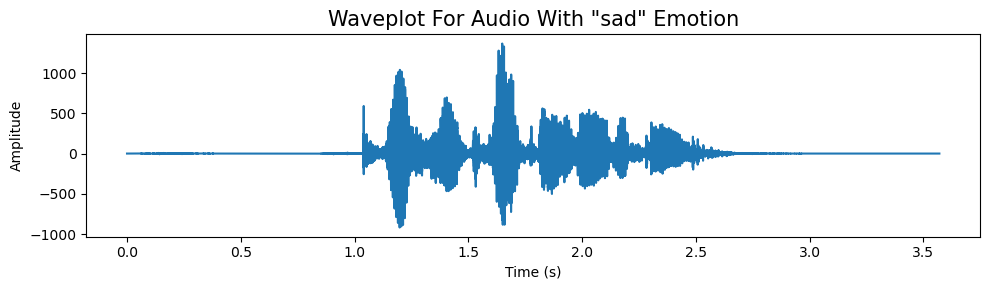

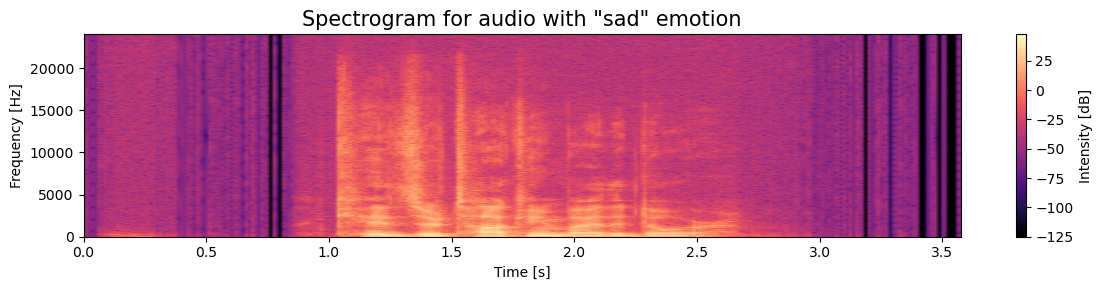

In [157]:
emotion='sad'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)


create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\3715123597.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


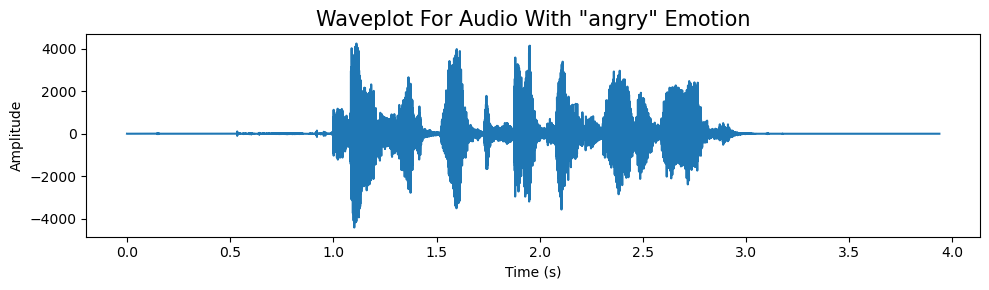

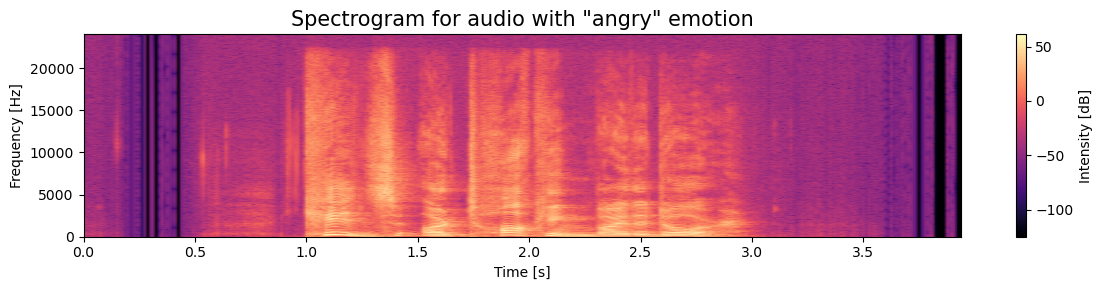

In [158]:
emotion='angry'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)


create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

# Data Augmentation

#### https://www.researchgate.net/publication/365515286_Data_Augmentation_and_Deep_Learning_Methods_in_Sound_Classification_A_Systematic_Review
Mel-Frequency Cepstral Coefficients (MFCCs): Widely used for capturing the timbral aspects of audio signals.​

Log-Mel Spectrograms: Providing a time-frequency representation that aligns with human auditory perception.​

Chroma Features: Capturing harmonic and pitch content, useful in music-related tasks.

#### https://arxiv.org/abs/2306.05621

Raw audio was converted into LMS features

These LMS features were input into a deep CNN to learn an embedding

The CNN-generated embeddings were then clustered using Agglomerative Hierarchical Clustering (AHC)

This whole process was jointly optimized, refining the CNN and clustering assignments together

#### https://arxiv.org/abs/2503.18579